In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"/content/Spotify_Youtube.csv")
data = data.drop(columns=['Unnamed: 0','Url_spotify','Url_youtube', 'Title', 'Channel','Uri','Description','Track','Album'],axis=1)


In [3]:
data.columns

Index(['Artist', 'Album_type', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [5]:
data

Artist Album_type  Danceability  Energy   Key  Loudness  \
0               Gorillaz      album         0.818   0.705   6.0    -6.679   
1               Gorillaz      album         0.676   0.703   8.0    -5.815   
2               Gorillaz     single         0.695   0.923   1.0    -3.930   
3               Gorillaz      album         0.689   0.739   2.0    -5.810   
4               Gorillaz      album         0.663   0.694  10.0    -8.627   
...                  ...        ...           ...     ...   ...       ...   
15549  Chance the Rapper     single         0.681   0.521   0.0    -5.849   
15550  Chance the Rapper      album         0.679   0.645   6.0    -7.777   
15551  Chance the Rapper      album         0.652   0.795  11.0    -5.192   
15552  Chance the Rapper      album         0.704   0.777   2.0    -5.729   
15553  Chance the Rapper        NaN           NaN     NaN   NaN       NaN   

       Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0           0.1770      0.008360          0.002330    0.6130    0.772   
1           0.0302      0.086900          0.000687    0.0463    0.852   
2           0.0522      0.042500          0.046900    0.1160    0.551   
3           0.0260      0.000015          0.509000    0.0640    0.578   
4           0.1710      0.025300          0.000000    0.0698    0.525   
...            ...           ...               ...       ...      ...   
15549       0.1410      0.120000          0.000084    0.1080    0.181   
15550       0.2220      0.051800          0.000000    0.1450    0.203   
15551       0.1740      0.156000          0.000000    0.1230    0.788   
15552       0.1950      0.035800          0.000000    0.1510    0.392   
15553          NaN           NaN               NaN       NaN      NaN   

         Tempo  Duration_ms        Views      Likes  Comments Licensed  \
0      138.559     222640.0  693555221.0  6220896.0  169907.0     True   
1       92.761     200173.0   72011645.0  1079128.0   31003.0     True   
2      108.014     215150.0    8435055.0   282142.0    7399.0     True   
3      120.423     233867.0  211754952.0  1788577.0   55229.0     True   
4      167.953     340920.0  618480958.0  6197318.0  155930.0     True   
...        ...          ...          ...        ...       ...      ...   
15549   94.997     229747.0   66704025.0   487483.0   11822.0     True   
15550  125.795     307188.0    1426510.0     5361.0     129.0    False   
15551  135.018     304607.0  169921930.0  1038708.0   33268.0    False   
15552  111.921     141542.0    2894906.0    44420.0     107.0     True   
15553      NaN          NaN          NaN        NaN       NaN      NaN   

      official_video        Stream  
0               True  1.040235e+09  
1               True  3.100837e+08  
2               True  6.306347e+07  
3               True  4.346636e+08  
4               True  6.172597e+08  
...              ...           ...  
15549           True  5.622718e+08  
15550          False  1.388641e+08  
15551          False  4.706810e+08  
15552           True  2.585127e+08  
15553            NaN           NaN  

[15554 rows x 19 columns]

<ipython-input-4-9791f6916fbd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Danceability', y='Album_type', inner='box', palette='Dark2')


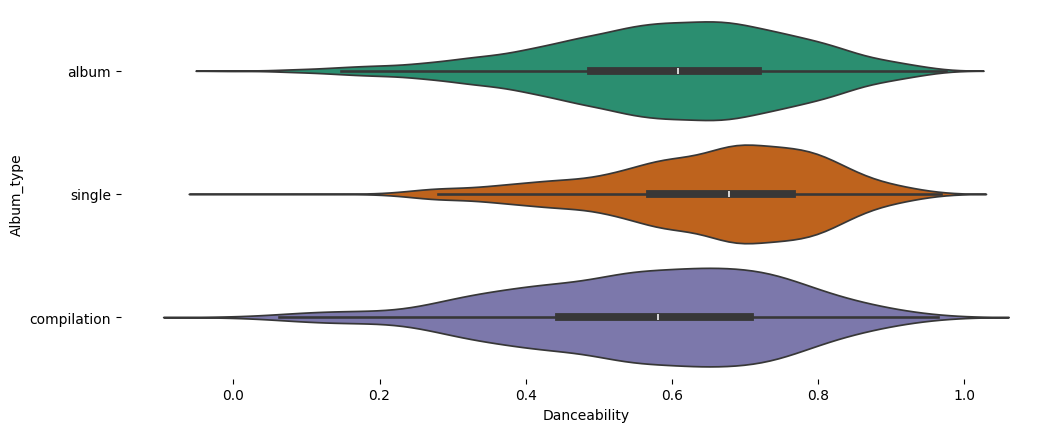

In [4]:
# @title Album_type vs Danceability

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Album_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Danceability', y='Album_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
df = data

df['Likes'] = df['Likes'].fillna(0)
df['Comments'] = df['Comments'].fillna(0)
df.dropna(inplace=True)


In [7]:
data

Artist Album_type  Danceability  Energy   Key  Loudness  \
0               Gorillaz      album         0.818   0.705   6.0    -6.679   
1               Gorillaz      album         0.676   0.703   8.0    -5.815   
2               Gorillaz     single         0.695   0.923   1.0    -3.930   
3               Gorillaz      album         0.689   0.739   2.0    -5.810   
4               Gorillaz      album         0.663   0.694  10.0    -8.627   
...                  ...        ...           ...     ...   ...       ...   
15548  Chance the Rapper      album         0.670   0.693   6.0    -8.340   
15549  Chance the Rapper     single         0.681   0.521   0.0    -5.849   
15550  Chance the Rapper      album         0.679   0.645   6.0    -7.777   
15551  Chance the Rapper      album         0.652   0.795  11.0    -5.192   
15552  Chance the Rapper      album         0.704   0.777   2.0    -5.729   

       Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0           0.1770      0.008360          0.002330    0.6130    0.772   
1           0.0302      0.086900          0.000687    0.0463    0.852   
2           0.0522      0.042500          0.046900    0.1160    0.551   
3           0.0260      0.000015          0.509000    0.0640    0.578   
4           0.1710      0.025300          0.000000    0.0698    0.525   
...            ...           ...               ...       ...      ...   
15548       0.3500      0.200000          0.000000    0.0909    0.388   
15549       0.1410      0.120000          0.000084    0.1080    0.181   
15550       0.2220      0.051800          0.000000    0.1450    0.203   
15551       0.1740      0.156000          0.000000    0.1230    0.788   
15552       0.1950      0.035800          0.000000    0.1510    0.392   

         Tempo  Duration_ms        Views      Likes  Comments Licensed  \
0      138.559     222640.0  693555221.0  6220896.0  169907.0     True   
1       92.761     200173.0   72011645.0  1079128.0   31003.0     True   
2      108.014     215150.0    8435055.0   282142.0    7399.0     True   
3      120.423     233867.0  211754952.0  1788577.0   55229.0     True   
4      167.953     340920.0  618480958.0  6197318.0  155930.0     True   
...        ...          ...          ...        ...       ...      ...   
15548   87.017     212093.0  213519061.0  4044232.0  209623.0     True   
15549   94.997     229747.0   66704025.0   487483.0   11822.0     True   
15550  125.795     307188.0    1426510.0     5361.0     129.0    False   
15551  135.018     304607.0  169921930.0  1038708.0   33268.0    False   
15552  111.921     141542.0    2894906.0    44420.0     107.0     True   

      official_video        Stream  
0               True  1.040235e+09  
1               True  3.100837e+08  
2               True  6.306347e+07  
3               True  4.346636e+08  
4               True  6.172597e+08  
...              ...           ...  
15548           True  6.942986e+08  
15549           True  5.622718e+08  
15550          False  1.388641e+08  
15551          False  4.706810e+08  
15552           True  2.585127e+08  

[14719 rows x 19 columns]

Album_type
album          11430
single          2613
compilation      676
Name: count, dtype: int64


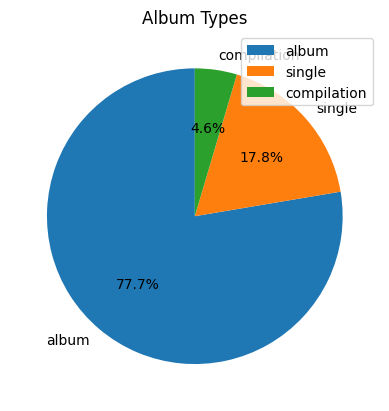

In [8]:
import matplotlib.pyplot as plt

album_type_count = data['Album_type'].value_counts()
print(album_type_count)

labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()


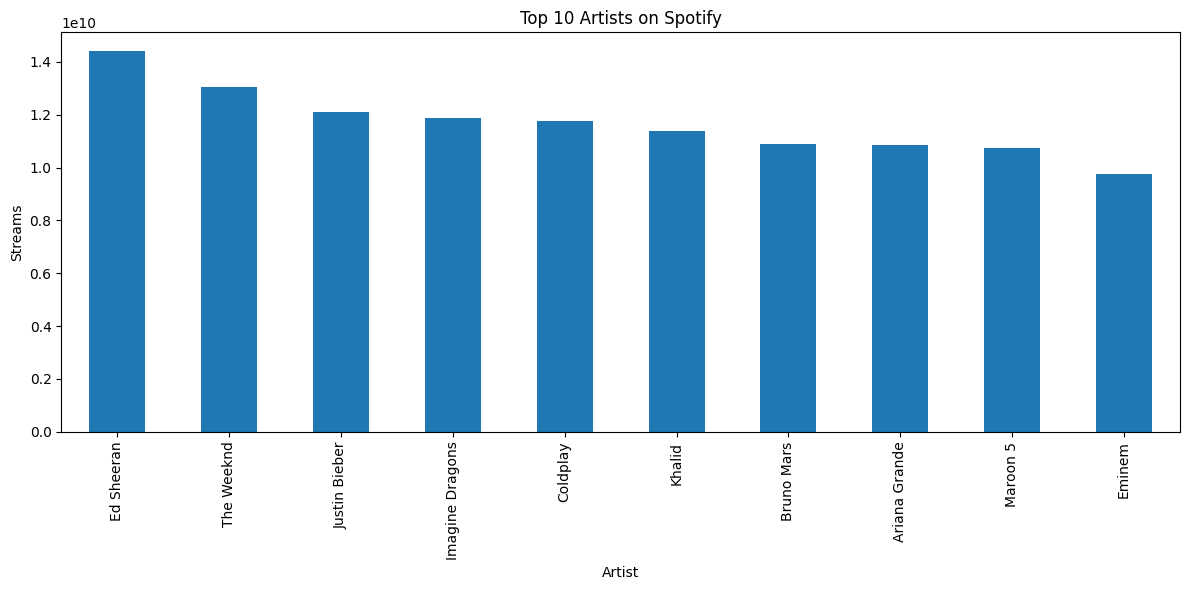

In [9]:
# Create two separate DataFrames for views and streams
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, ax2 = plt.subplots(1, 1, figsize=(12,6))

# top 10 spotofy
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)

ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

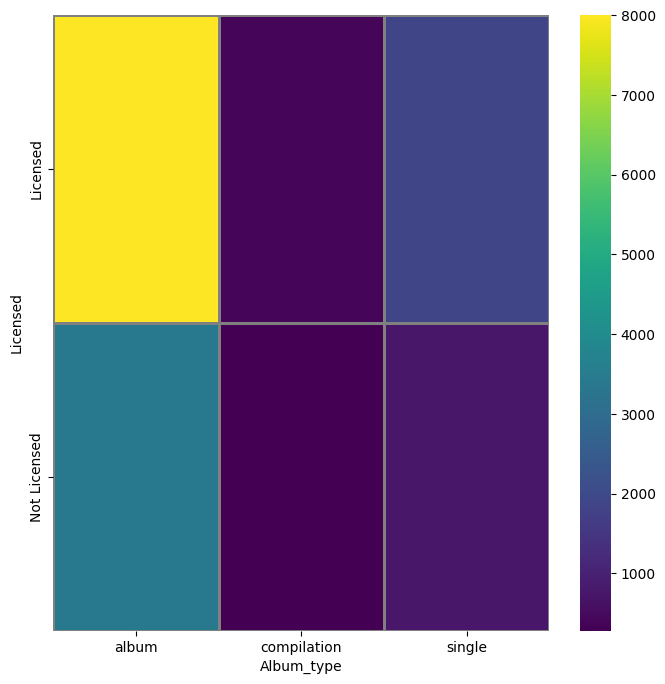

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your pandas DataFrame containing the dataset
# Replace 'data' with your actual DataFrame name

# Replace 1 with 'Licensed' and 0 with 'Not Licensed'
data['Licensed'] = data['Licensed'].replace({1: 'Licensed', 0: 'Not Licensed'})
data['Album_type'] = data['Album_type'].replace({0:'album',1:'compilation',2:'single'})

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Licensed'].value_counts()
    for x_label, grp in data.groupby('Album_type')
})
sns.heatmap(df_2dhist, cmap='viridis', linewidths=1, linecolor='gray')
plt.xlabel('Album_type')
plt.ylabel('Licensed')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
lis = ['Album_type',
      'Licensed',
      'official_video']
for l in lis:
    data[l] = le.fit_transform(data[l])

In [ ]:
data

Artist  Album_type  Danceability  Energy   Key  Loudness  \
0            Gorillaz           0         0.818   0.705   6.0    -6.679   
1            Gorillaz           0         0.676   0.703   8.0    -5.815   
2            Gorillaz           2         0.695   0.923   1.0    -3.930   
3            Gorillaz           0         0.689   0.739   2.0    -5.810   
4            Gorillaz           0         0.663   0.694  10.0    -8.627   
...               ...         ...           ...     ...   ...       ...   
1433       Sonu Nigam           2         0.432   0.695   1.0    -8.022   
1434       Sonu Nigam           0         0.814   0.909   0.0    -6.875   
1435       Sonu Nigam           2         0.471   0.329   0.0   -11.958   
1436       Sonu Nigam           0         0.757   0.942   9.0    -4.130   
1437  Lata Mangeshkar           2         0.756   0.413   0.0   -15.549   

      Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0          0.1770      0.008360          0.002330    0.6130    0.772  138.559   
1          0.0302      0.086900          0.000687    0.0463    0.852   92.761   
2          0.0522      0.042500          0.046900    0.1160    0.551  108.014   
3          0.0260      0.000015          0.509000    0.0640    0.578  120.423   
4          0.1710      0.025300          0.000000    0.0698    0.525  167.953   
...           ...           ...               ...       ...      ...      ...   
1433       0.1110      0.732000          0.001400    0.2740    0.513  116.153   
1434       0.0753      0.319000          0.000000    0.3450    0.961  100.004   
1435       0.0312      0.780000          0.002100    0.1170    0.144  126.107   
1436       0.0461      0.158000          0.007840    0.5070    0.728  120.004   
1437       0.1070      0.589000          0.014600    0.1090    0.353   91.951   

      Duration_ms        Views      Likes  Comments  Licensed  official_video  \
0        222640.0  693555221.0  6220896.0  169907.0         0               1   
1        200173.0   72011645.0  1079128.0   31003.0         0               1   
2        215150.0    8435055.0   282142.0    7399.0         0               1   
3        233867.0  211754952.0  1788577.0   55229.0         0               1   
4        340920.0  618480958.0  6197318.0  155930.0         0               1   
...           ...          ...        ...       ...       ...             ...   
1433     290053.0   20117583.0   265586.0    4217.0         0               1   
1434     230947.0   35877659.0   257445.0    3129.0         0               1   
1435     341780.0   53270235.0   678530.0    9282.0         0               1   
1436     228469.0   25757377.0   121142.0    1722.0         0               1   
1437     122609.0    5441239.0   103298.0    1454.0         0               1   

            Stream  
0     1.040235e+09  
1     3.100837e+08  
2     6.306347e+07  
3     4.346636e+08  
4     6.172597e+08  
...            ...  
1433  3.613563e+07  
1434  1.695360e+07  
1435  2.277022e+07  
1436  9.793879e+06  
1437  1.174337e+07  

[1348 rows x 19 columns]

In [ ]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
artist_grouped = data.groupby('Artist')[['Views', 'Stream']].sum()

# Sort the artists by the sum of views and streams in descending order
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# Get the top 10 artists with the most number of views on YouTube and streams on Spotify
top_10 = artist_sorted.head(10)

top_10

Views        Stream
Artist                                      
Luis Fonsi        1.162811e+10  5.054326e+09
Daddy Yankee      1.087193e+10  5.135462e+09
Coldplay          9.997278e+09  1.177848e+10
Eminem            9.119324e+09  9.748588e+09
Enrique Iglesias  8.860271e+09  3.732862e+09
Shakira           8.818140e+09  4.295045e+09
Sia               8.441835e+09  7.368344e+09
Farruko           7.125613e+09  4.935549e+09
Nicky Jam         6.322031e+09  3.455008e+09
Jennifer Lopez    6.229828e+09  2.462557e+09

In [ ]:
import seaborn as sns


cols = list(data.columns)
cols.remove("Album_type")
cols.remove("Licensed")
cols.remove("official_video")

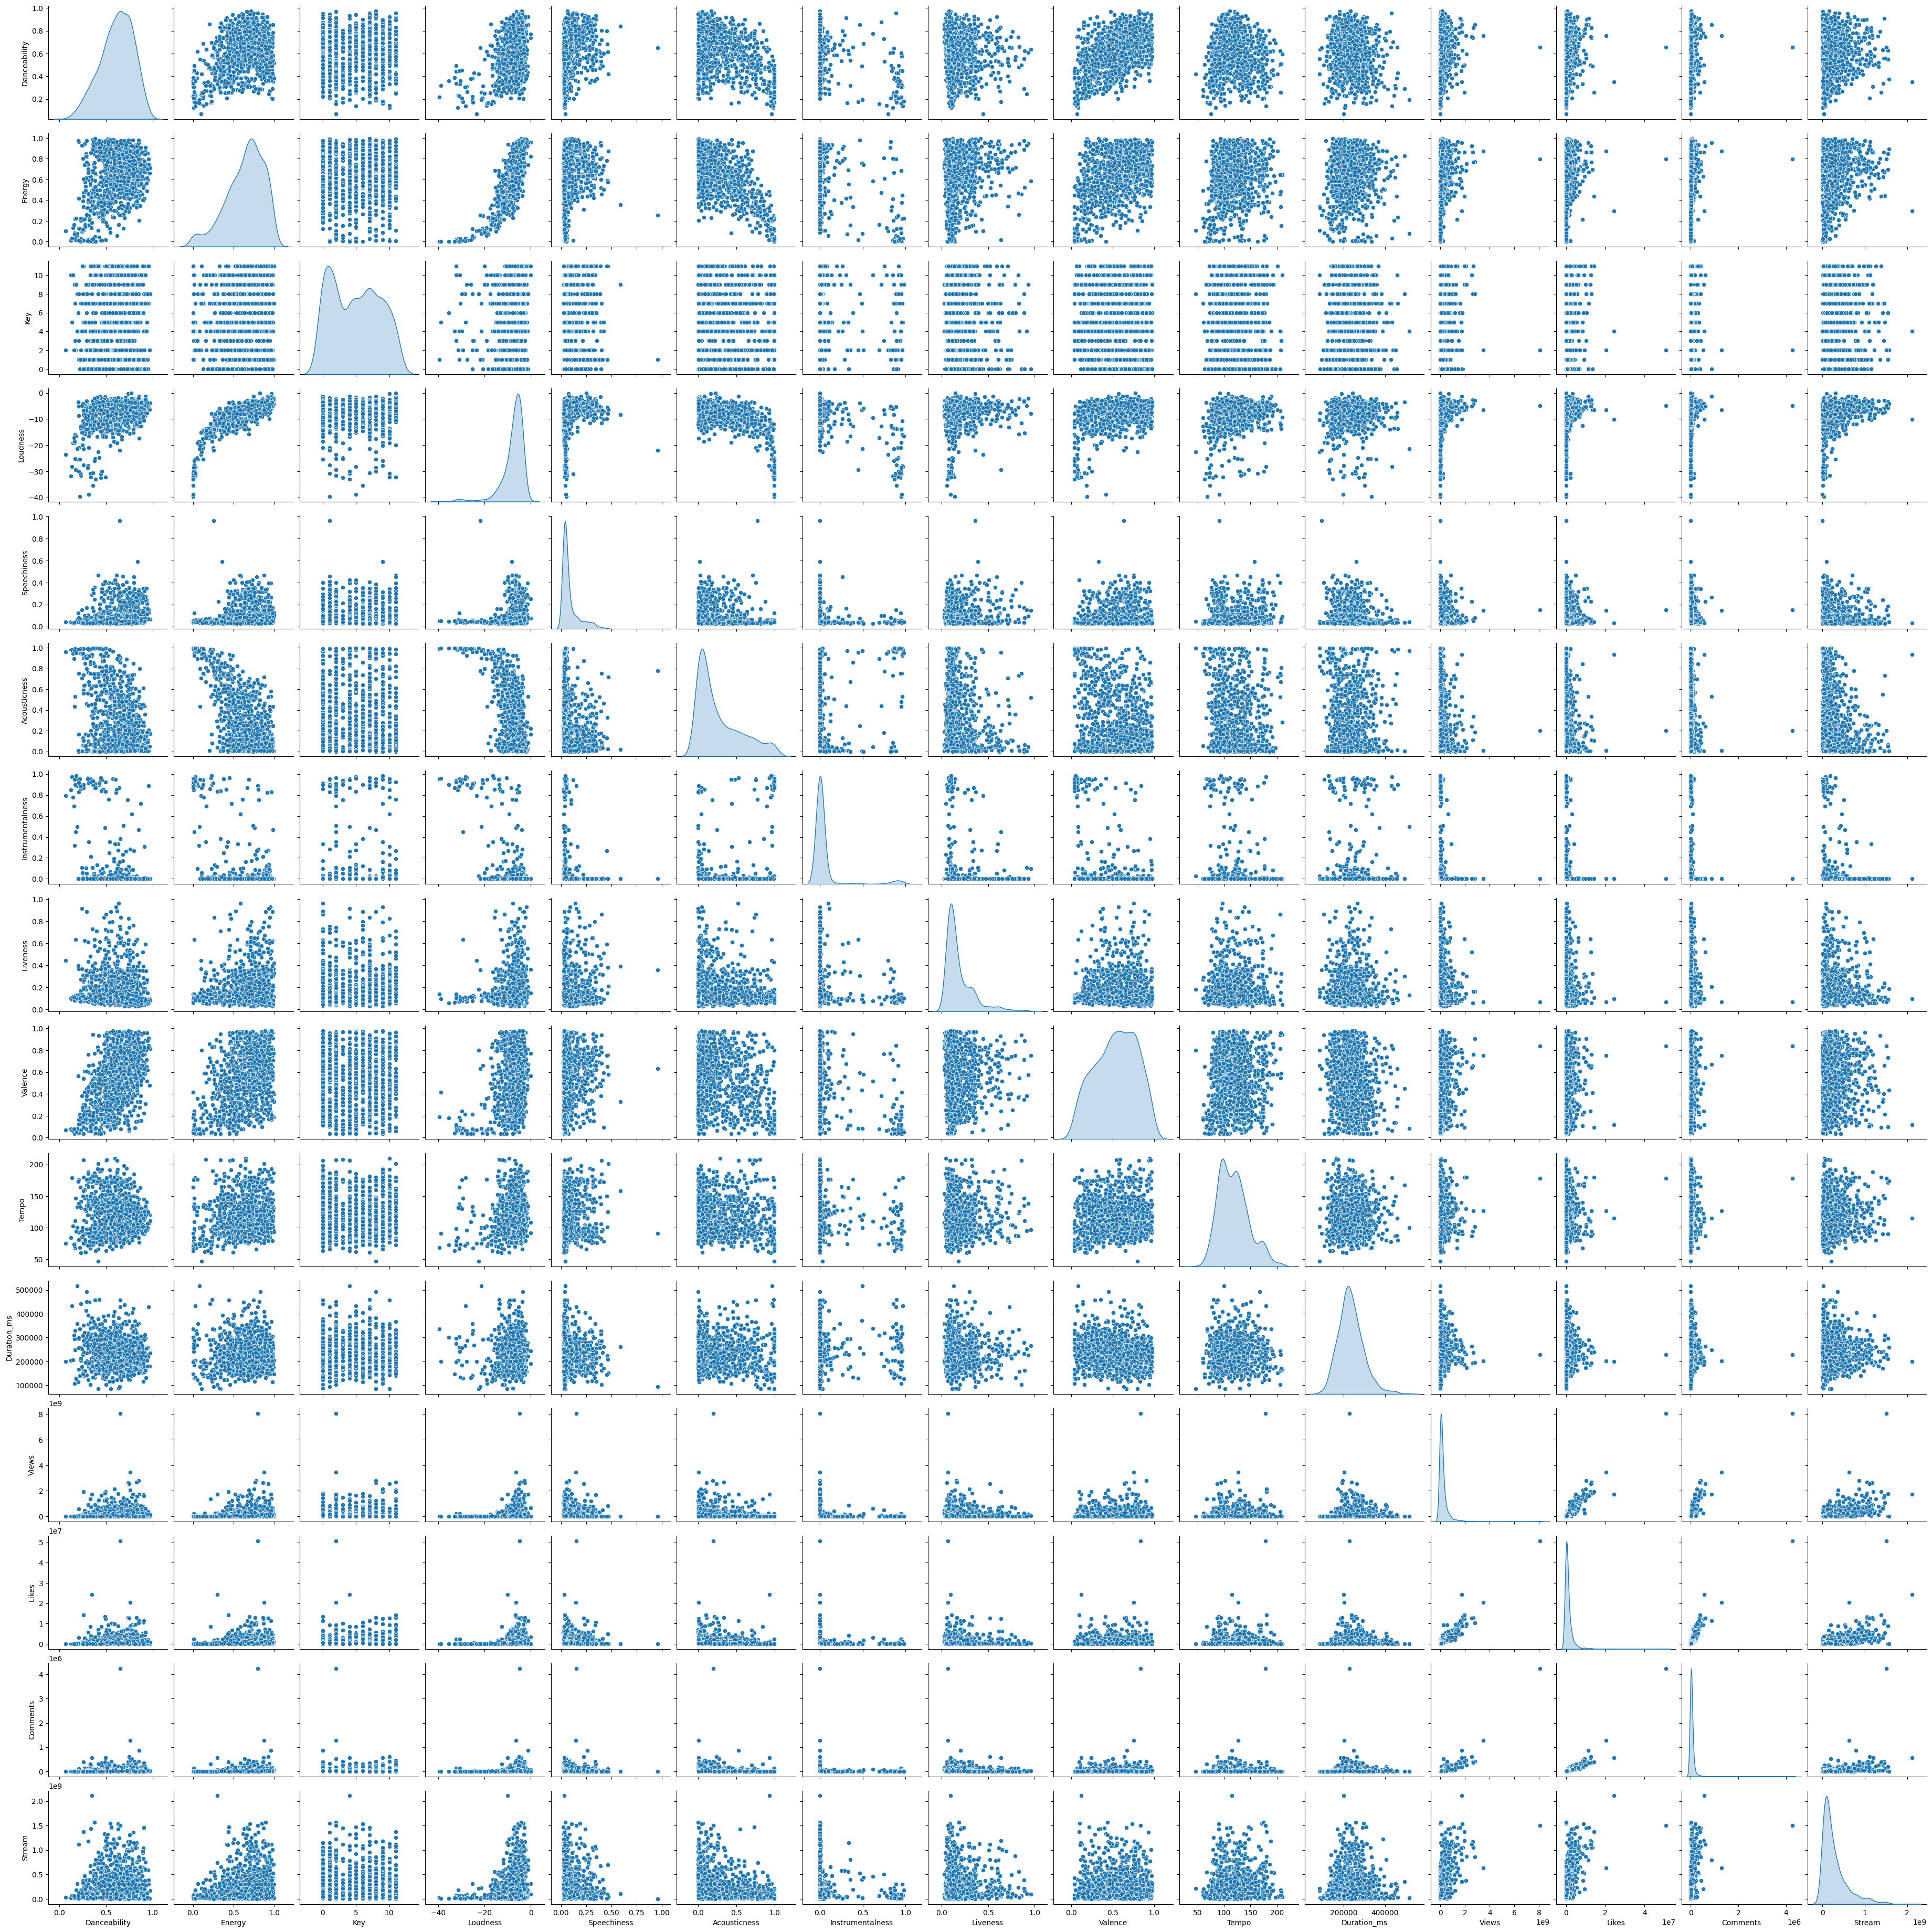

In [ ]:
sns.pairplot(train_dataset[cols], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

count          mean           std            min  \
Album_type        1078.0  2.857143e-01  6.675945e-01       0.000000   
Danceability      1078.0  6.147134e-01  1.738600e-01       0.069000   
Energy            1078.0  6.396345e-01  2.269085e-01       0.002690   
Key               1078.0  4.932282e+00  3.583473e+00       0.000000   
Loudness          1078.0 -7.754359e+00  5.036425e+00     -39.627000   
Speechiness       1078.0  8.916763e-02  9.307506e-02       0.023500   
Acousticness      1078.0  2.706808e-01  2.856612e-01       0.000005   
Instrumentalness  1078.0  5.314181e-02  1.945578e-01       0.000000   
Liveness          1078.0  1.884716e-01  1.567334e-01       0.026000   
Valence           1078.0  5.380956e-01  2.469739e-01       0.034500   
Tempo             1078.0  1.183272e+02  2.835583e+01      46.718000   
Duration_ms       1078.0  2.349963e+05  6.076156e+04   84987.000000   
Views             1078.0  2.102141e+08  4.908733e+08    1122.000000   
Likes             1078.0  1.241888e+06  2.982367e+06       0.000000   
Comments          1078.0  4.556224e+04  1.988584e+05       0.000000   
Licensed          1078.0  2.133581e-01  4.098686e-01       0.000000   
official_video    1078.0  8.218924e-01  3.827809e-01       0.000000   
Stream            1078.0  2.815453e+08  2.990108e+08  282266.000000   

                           25%           50%           75%           max  
Album_type        0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  
Danceability      4.990000e-01  6.340000e-01  7.480000e-01  9.750000e-01  
Energy            4.982500e-01  6.815000e-01  8.070000e-01  9.960000e-01  
Key               2.000000e+00  5.000000e+00  8.000000e+00  1.100000e+01  
Loudness         -9.100750e+00 -6.488500e+00 -4.783250e+00 -1.400000e-01  
Speechiness       3.420000e-02  4.725000e-02  9.975000e-02  9.610000e-01  
Acousticness      3.940000e-02  1.575000e-01  4.497500e-01  9.950000e-01  
Instrumentalness  0.000000e+00  5.815000e-06  5.752500e-04  9.820000e-01  
Liveness          9.010000e-02  1.290000e-01  2.410000e-01  9.620000e-01  
Valence           3.482500e-01  5.485000e-01  7.437500e-01  9.780000e-01  
Tempo             9.599525e+01  1.159415e+02  1.350270e+02  2.096950e+02  
Duration_ms       1.954385e+05  2.295070e+05  2.680905e+05  5.173600e+05  
Views             8.155670e+06  6.566534e+07  2.228619e+08  8.079649e+09  
Likes             7.518900e+04  4.047360e+05  1.329108e+06  5.078865e+07  
Comments          1.814000e+03  1.189500e+04  3.766675e+04  4.252791e+06  
Licensed          0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
official_video    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
Stream            7.998671e+07  1.767566e+08  3.754109e+08  2.110574e+09

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Remove both variables from the features datasets
train_labels = train_features.pop('Stream')
train_labels_2 = train_features.pop('Views')
train_labels_3 = train_features.pop('Likes')
train_labels_4 = train_features.pop('Comments')


test_labels = test_features.pop('Stream')
test_labels_2 = test_features.pop('Views')
test_labels_3 = test_features.pop('Likes')
test_labels_4 = test_features.pop('Comments')


In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

mean           std
Album_type        2.857143e-01  6.675945e-01
Danceability      6.147134e-01  1.738600e-01
Energy            6.396345e-01  2.269085e-01
Key               4.932282e+00  3.583473e+00
Loudness         -7.754359e+00  5.036425e+00
Speechiness       8.916763e-02  9.307506e-02
Acousticness      2.706808e-01  2.856612e-01
Instrumentalness  5.314181e-02  1.945578e-01
Liveness          1.884716e-01  1.567334e-01
Valence           5.380956e-01  2.469739e-01
Tempo             1.183272e+02  2.835583e+01
Duration_ms       2.349963e+05  6.076156e+04
Views             2.102141e+08  4.908733e+08
Likes             1.241888e+06  2.982367e+06
Comments          4.556224e+04  1.988584e+05
Licensed          2.133581e-01  4.098686e-01
official_video    8.218924e-01  3.827809e-01
Stream            2.815453e+08  2.990108e+08

In [ ]:
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:                 Stream   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     73.49
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.55e-177
Time:                        04:14:17   Log-Likelihood:                -27791.
No. Observations:                1348   AIC:                         5.562e+04
Df Residuals:                    1330   BIC:                         5.571e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.379e+08   7.64e+07  

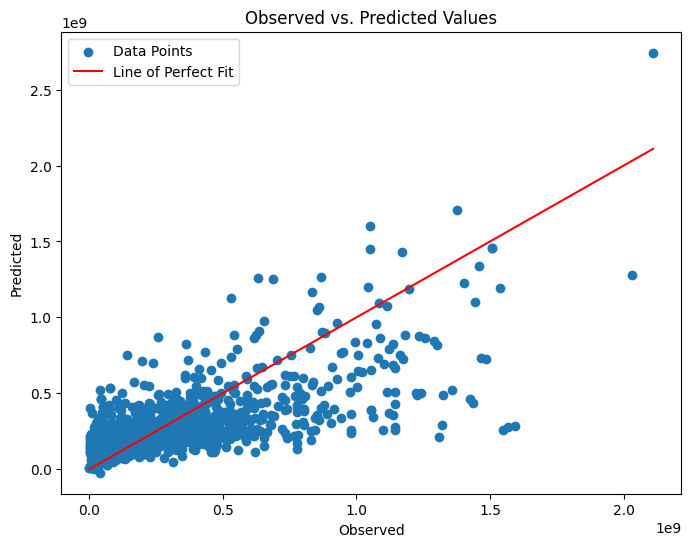

In [ ]:
y = data['Stream']

# Assume the features are in the remaining columns
X = data.drop(columns=['Stream','Artist'])

# Add constant term to the features
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

import matplotlib.pyplot as plt
import numpy as np

# Predicted values from the model
predicted_values = model.predict(X)

# Plot observed vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, label='Data Points')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted Values')

# Plot diagonal line representing perfect prediction
plt.plot(np.linspace(min(y), max(y), 100), np.linspace(min(y), max(y), 100), color='red', label='Line of Perfect Fit')

plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and train the decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_pred

Mean Squared Error: 4.730741340025514e+16


array([3.13769850e+07, 4.60908700e+07, 3.21943309e+08, ...,
       4.47678790e+07, 4.62597900e+07, 1.39271300e+06])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and train the decision tree regressor with regularization
model = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_pred

Mean Squared Error: 2.8768042967647864e+16


array([5.57419735e+07, 8.03460372e+07, 1.23414998e+08, ...,
       8.03460372e+07, 9.39792315e+07, 2.47125606e+07])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Specify the number of features to select
n_features_to_select = 5

# Create the RFE selector
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit the RFE selector to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features,attributes that contribute the most for streams on spotify:", selected_features)

Selected Features,attributes that contribute the most for streams on spotify: Index(['Acousticness', 'Duration_ms', 'Views', 'Likes', 'Comments'], dtype='object')


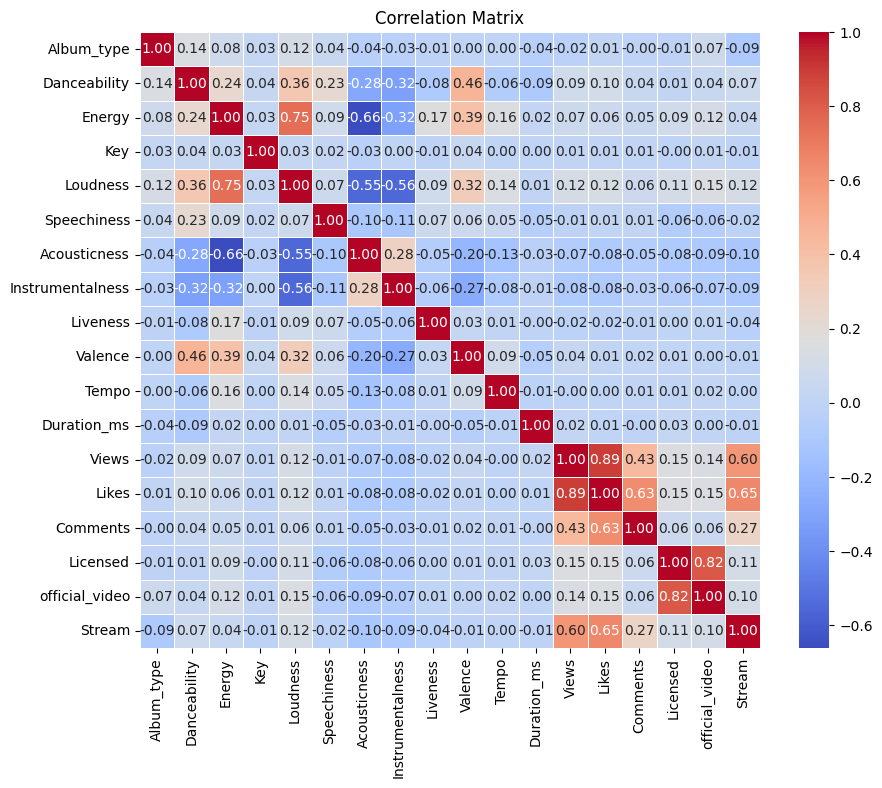

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'data' is your DataFrame containing the dataset
# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap to visualise the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


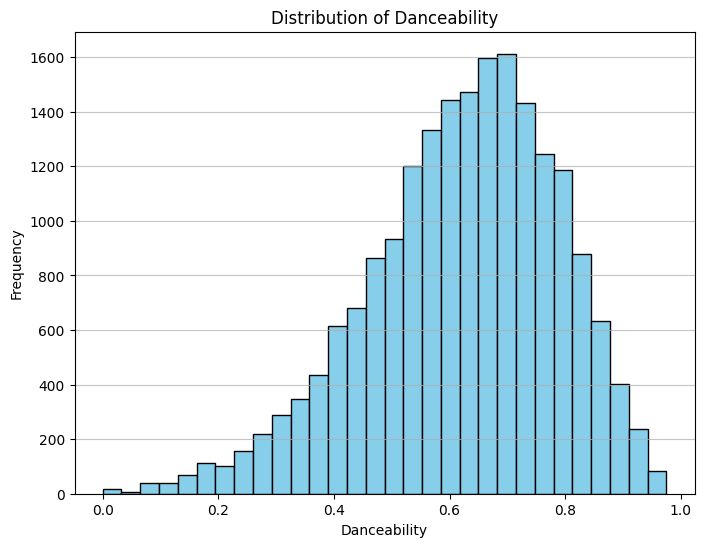

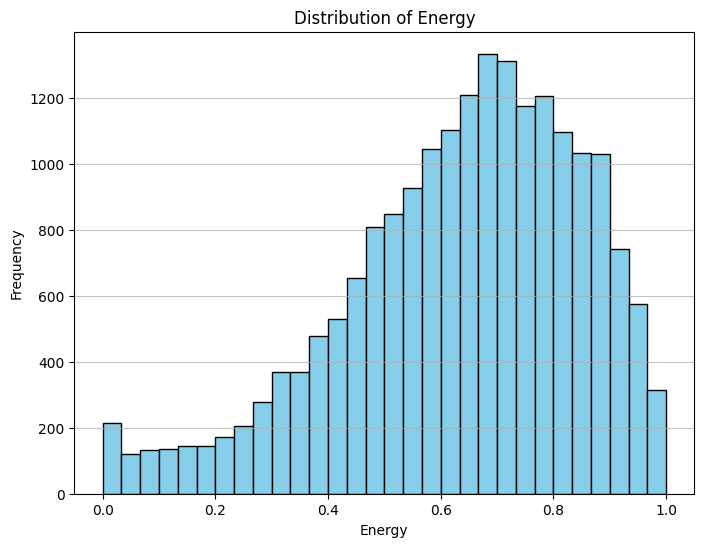

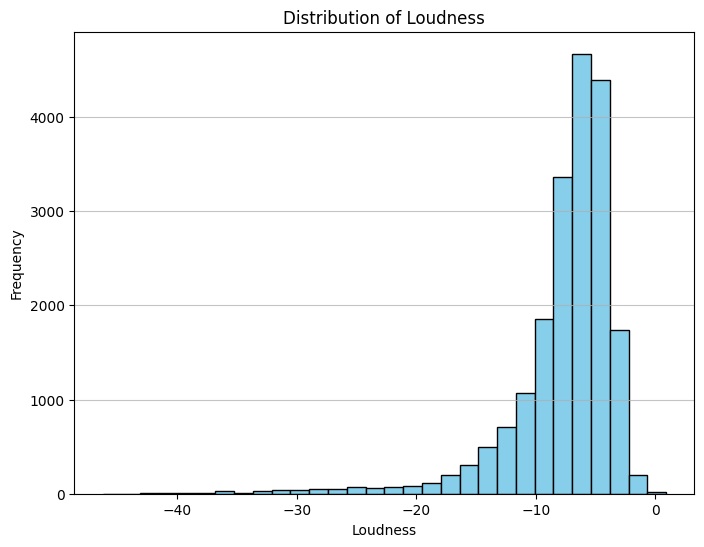

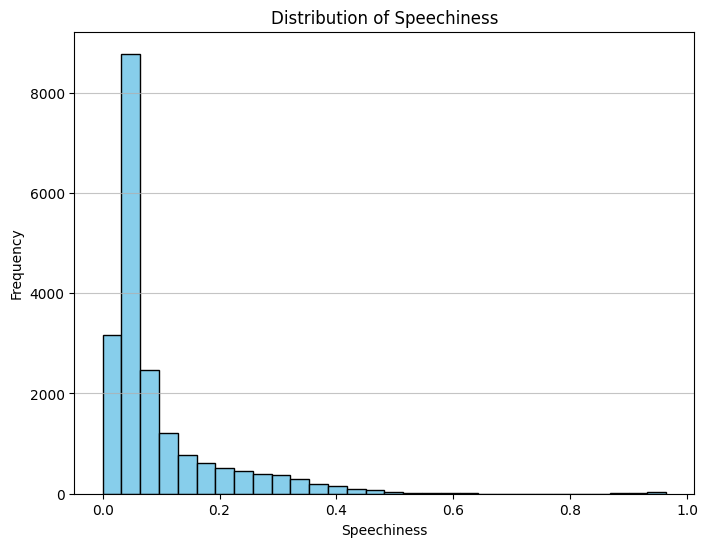

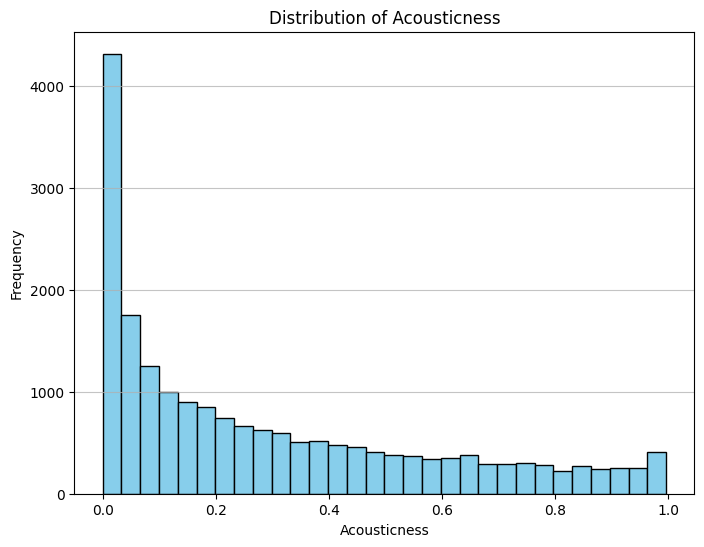

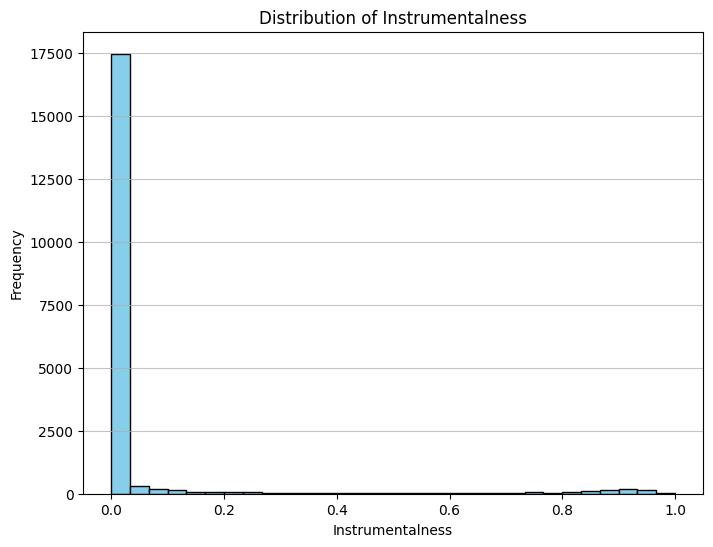

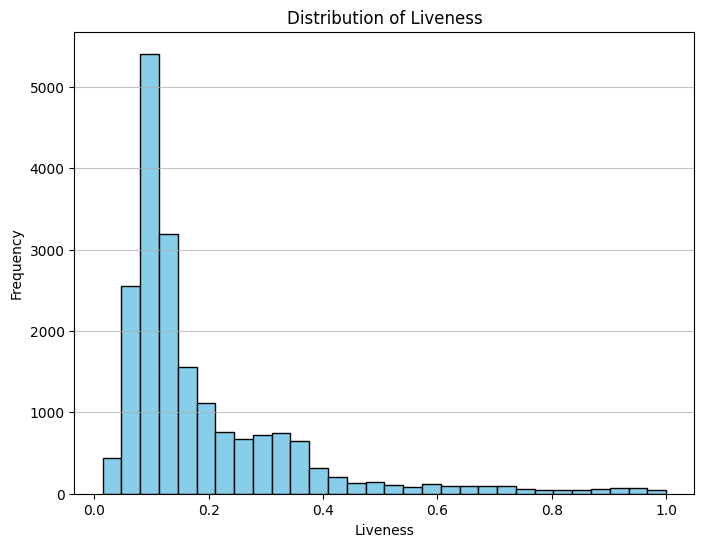

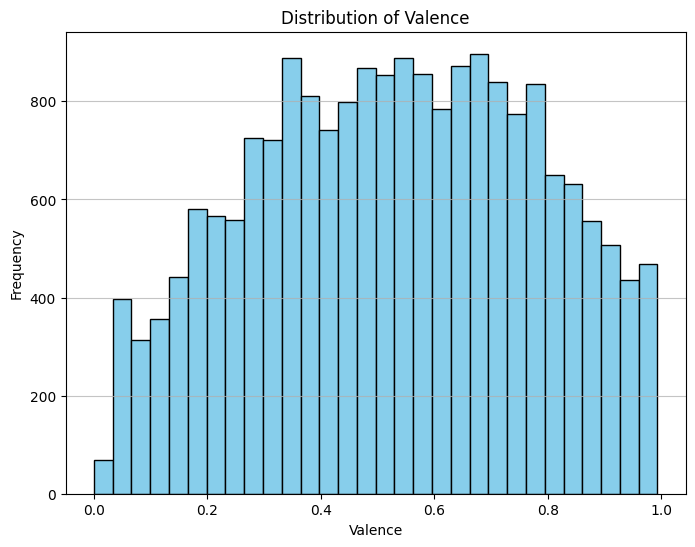

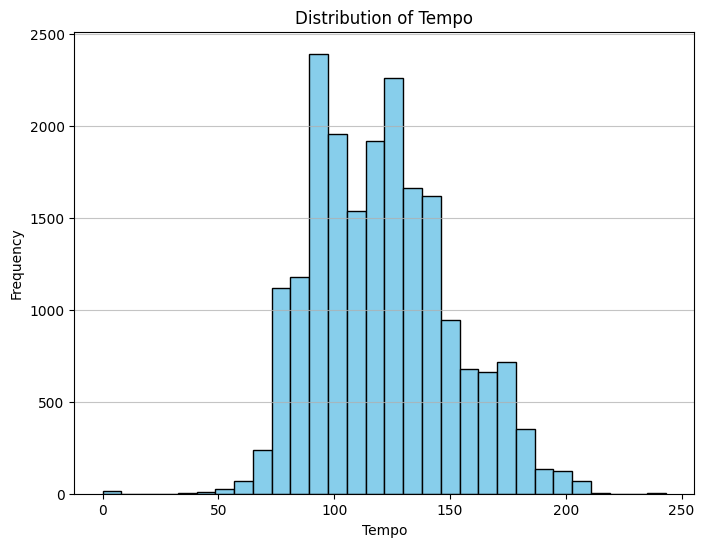

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your pandas DataFrame containing the dataset
# Replace 'df' with your actual DataFrame name

features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Plotting histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


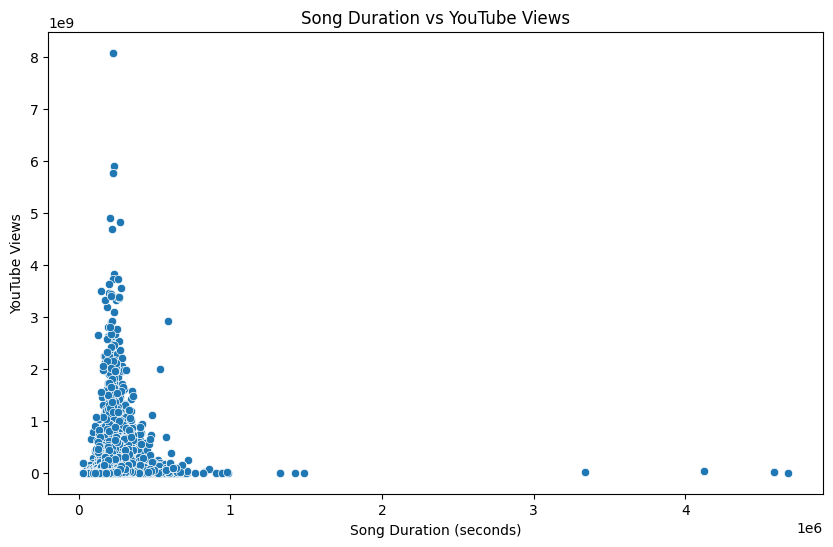

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to check correlation between song duration and YouTube views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_ms', y='Views', data=data)
plt.title('Song Duration vs YouTube Views')
plt.xlabel('Song Duration (seconds)')
plt.ylabel('YouTube Views')
plt.show()



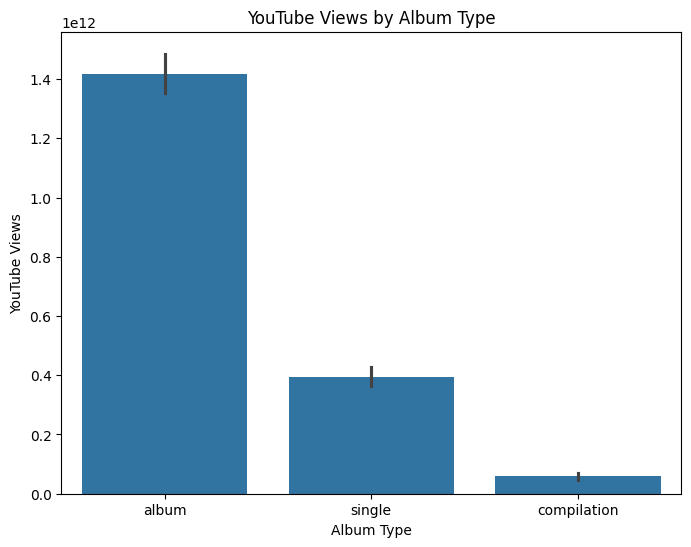

In [ ]:
# Bar plot to visualise YouTube views by album type
plt.figure(figsize=(8, 6))
sns.barplot(x='Album_type', y='Views', data=data, estimator=sum)
plt.title('YouTube Views by Album Type')
plt.xlabel('Album Type')
plt.ylabel('YouTube Views')
plt.show()


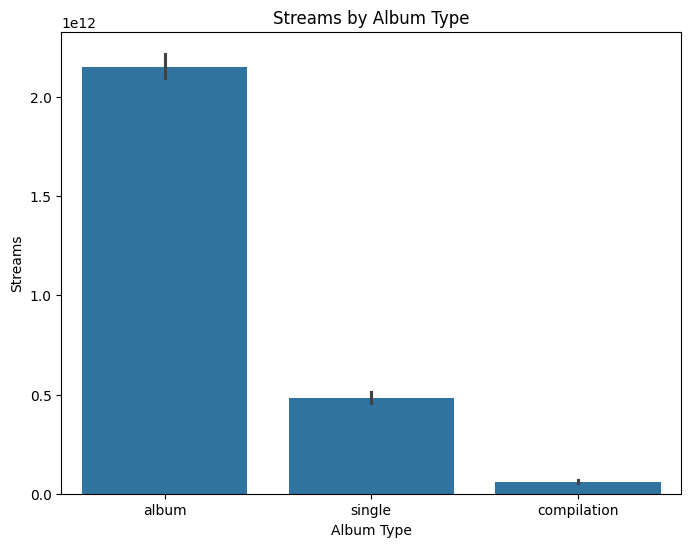

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Album_type', y='Stream', data=data, estimator=sum)
plt.title('Streams by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Streams')
plt.show()


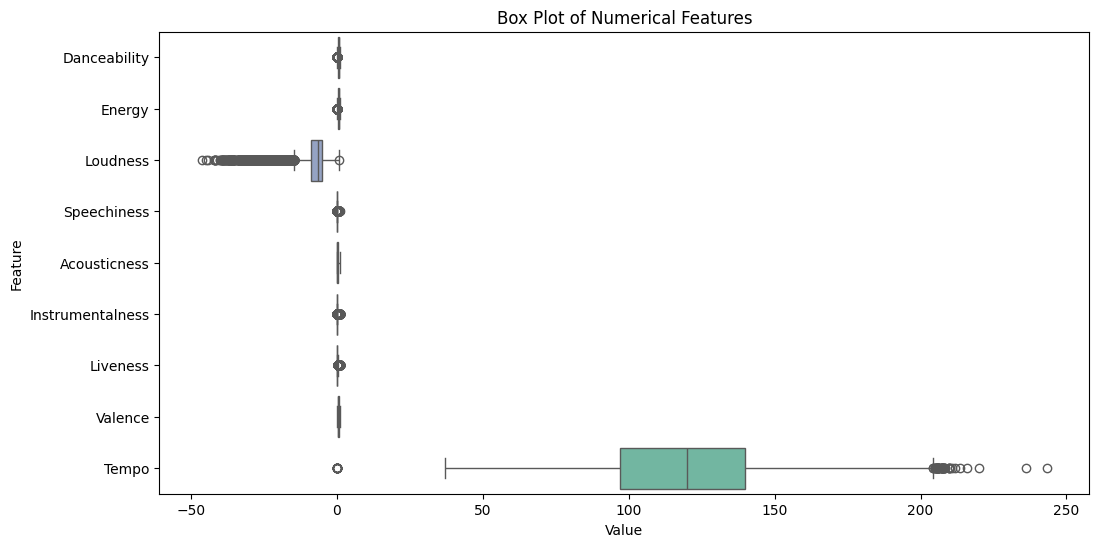

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame containing the dataset
# Replace 'df' with your actual DataFrame name

# Selecting only the numerical columns for box plot
numerical_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Creating box plots for each numerical feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], orient='h', palette='Set2')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Box Plot of Numerical Features')
plt.show()


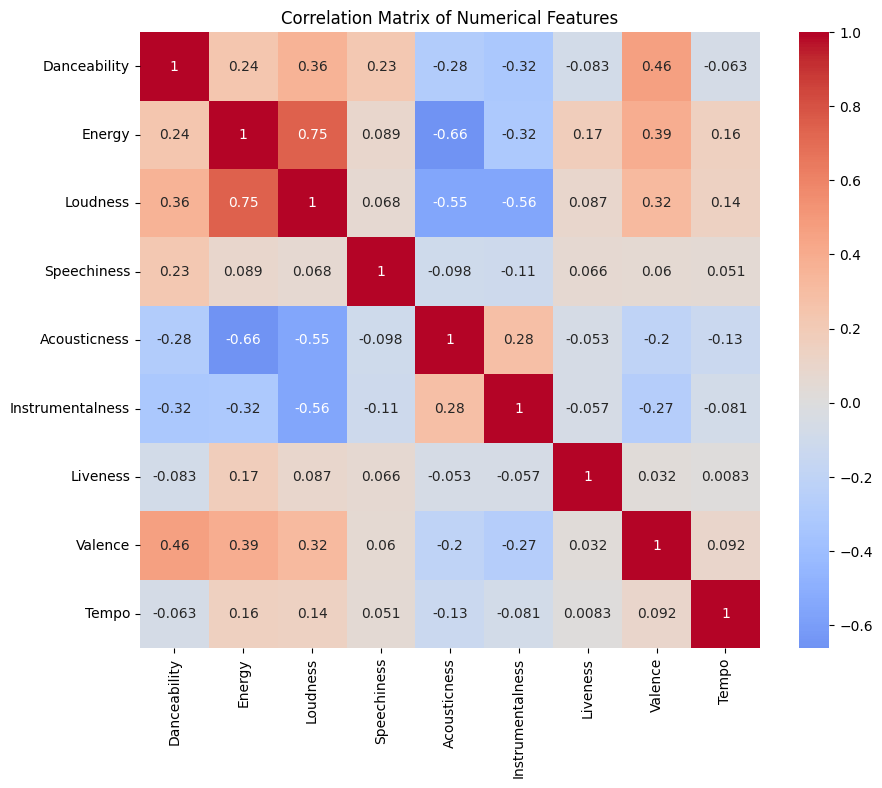

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame containing the dataset
# Replace 'df' with your actual DataFrame name

# Selecting only the numerical columns for correlation analysis
numerical_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
corr_df = df[numerical_cols].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


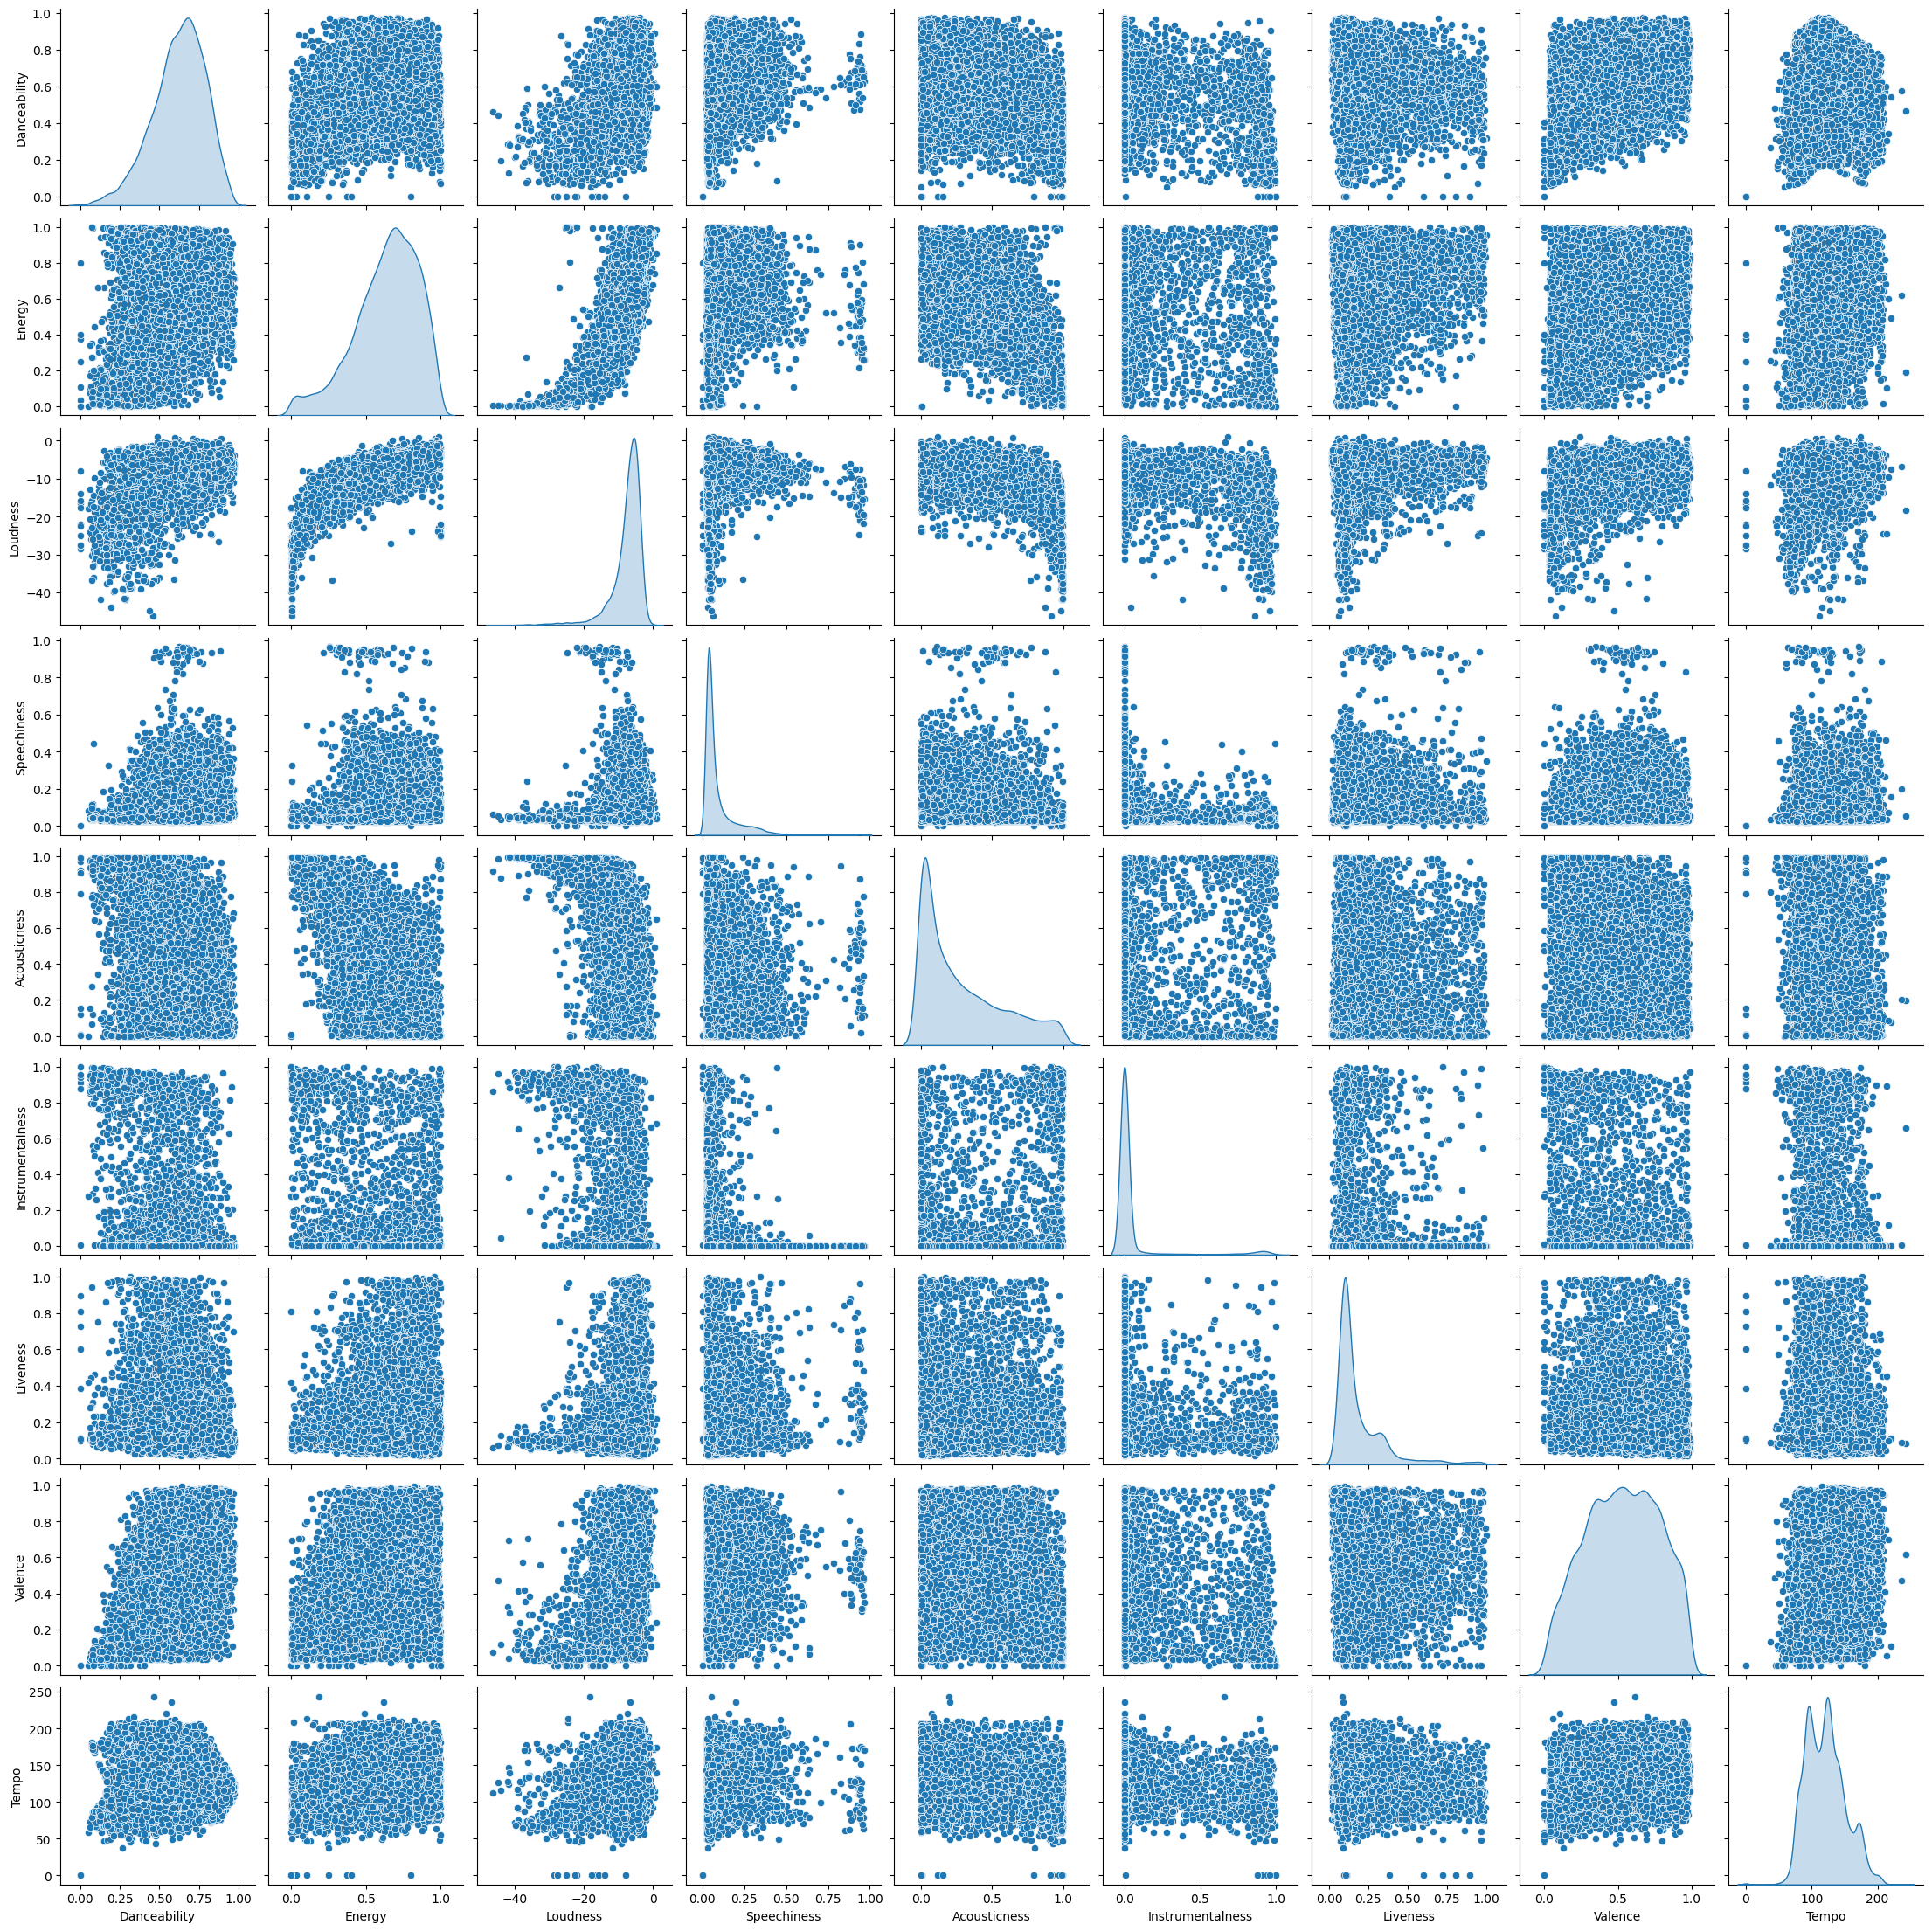

In [ ]:
sns.pairplot(train_dataset[numerical_cols], diag_kind='kde')